<a href="https://colab.research.google.com/github/Chandu106/Bit_predict/blob/main/Bit_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-908273fb-2bf9-8bbf-c8c1-baab40ca03f5)


# **Get Data**

In [3]:
# Download Bitcoin historical data from GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-08-21 08:45:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.008s  

2023-08-21 08:45:39 (20.8 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [4]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
len(df)

2787

In [7]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


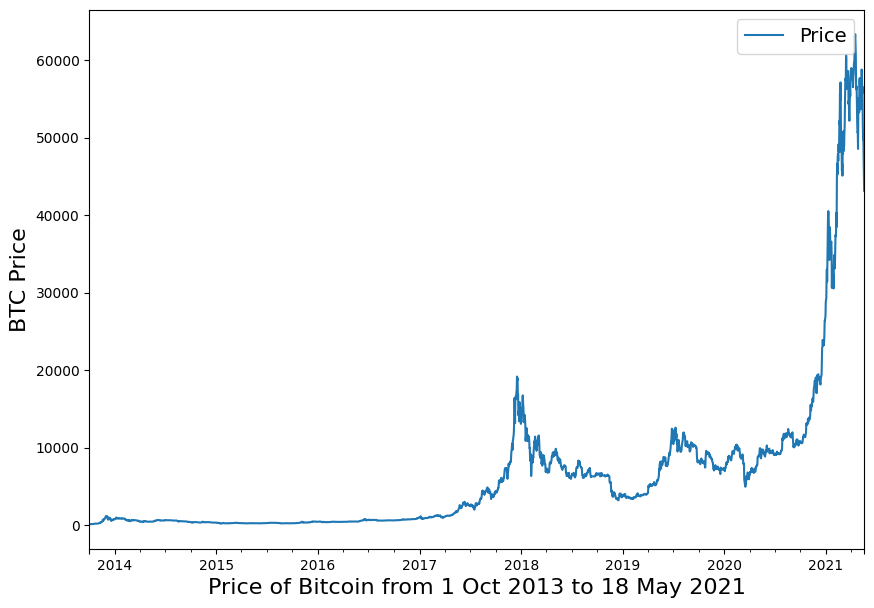

In [8]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price", fontsize=16)
plt.xlabel("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

*Importing time series data with python csv module*

In [9]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))# get the dates as dates (not strings), strptime = string parse time
        btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0, 0.5, 'BTC Price')

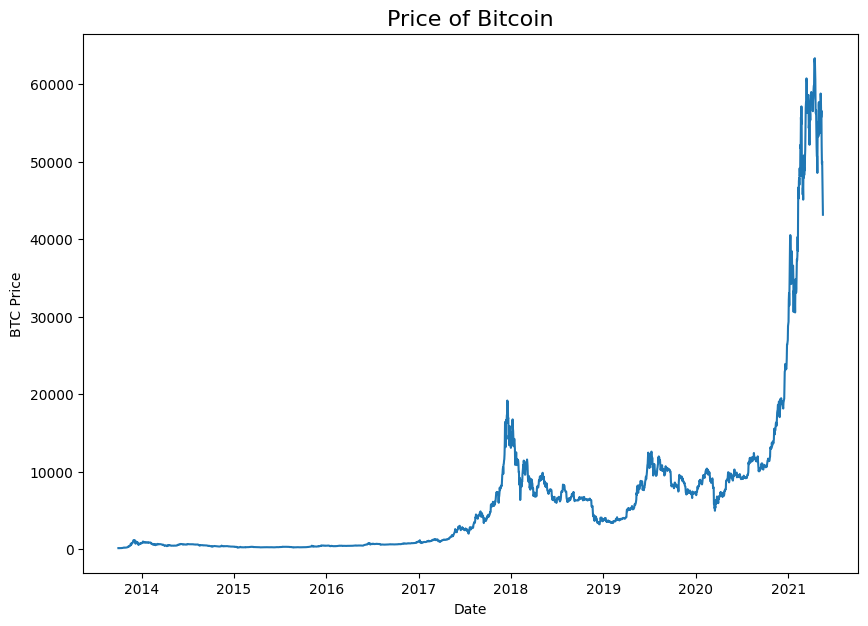

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price")

# **Format Data Part 1: Creating train and test datasets**

*Creating training and testing datasplits in a wrong way*

In [11]:
time_steps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [12]:
time_steps[:5], prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(time_steps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

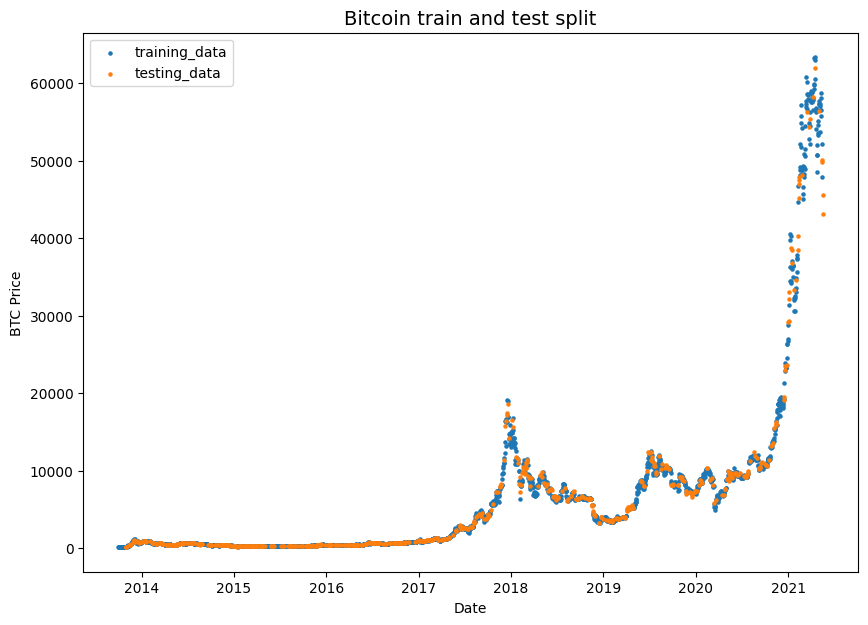

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="training_data")
plt.scatter(X_test, y_test , s=5, label="testing_data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Bitcoin train and test split", fontsize=14)
plt.legend()
plt.show();


*Creating training and testing datasplits in right way*

In [15]:
split_size = int(0.8 * len(prices))
X_train, y_train, = time_steps[:split_size], prices[:split_size]
X_test, y_test = time_steps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

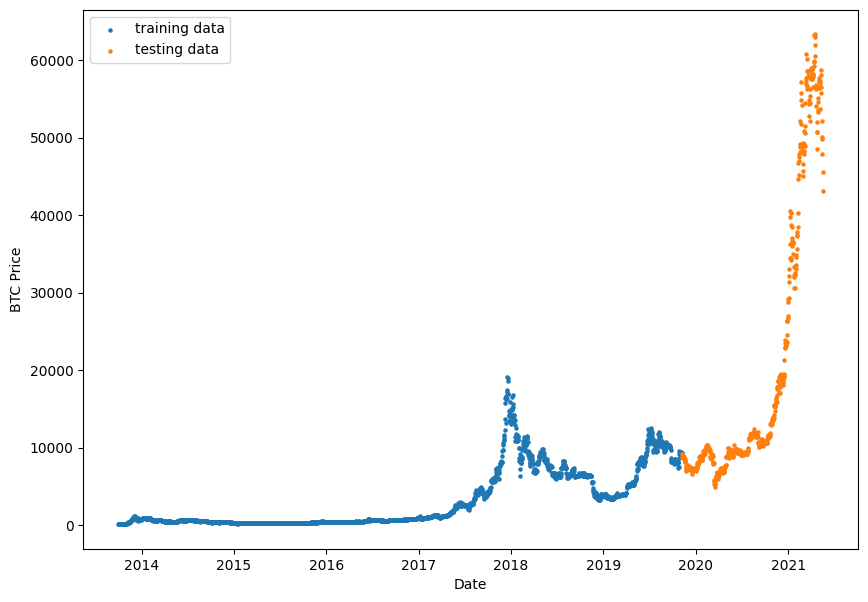

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="training data")
plt.scatter(X_test, y_test, s=5, label="testing data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend()
plt.show();

*Creating a plotting function*

In [17]:
def plot_time_series(time_steps, values, format=".", start=0, end=None, label=None):
    plt.plot(time_steps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    plt.legend(fontsize=14)
    plt.grid(True)

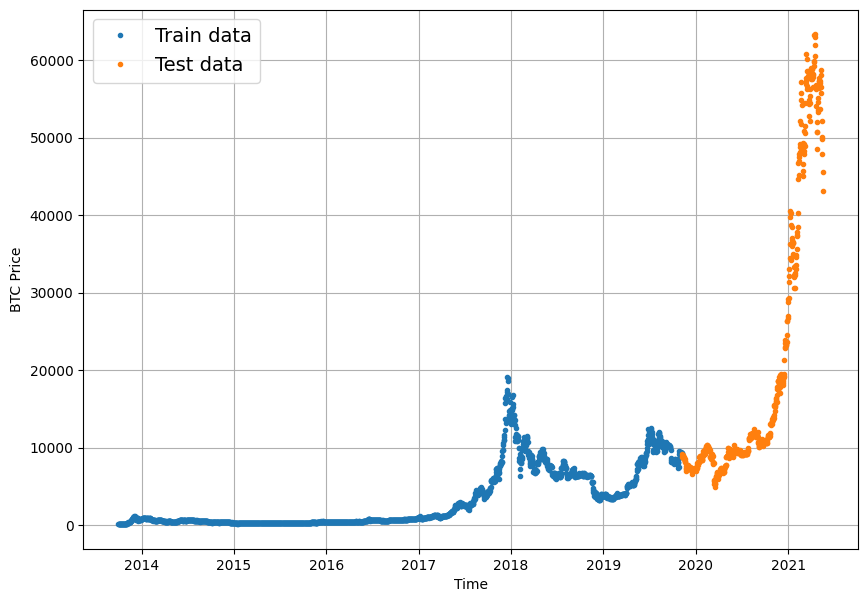

In [18]:
plt.figure(figsize=(10,7))
plot_time_series(time_steps=X_train, values=y_train, label="Train data")
plot_time_series(time_steps=X_test, values=y_test, label="Test data")

# **Model-0 : Naive forecast(baseline)**

In [19]:
naive_forecast = y_test[:-1] #naive forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] #view first 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

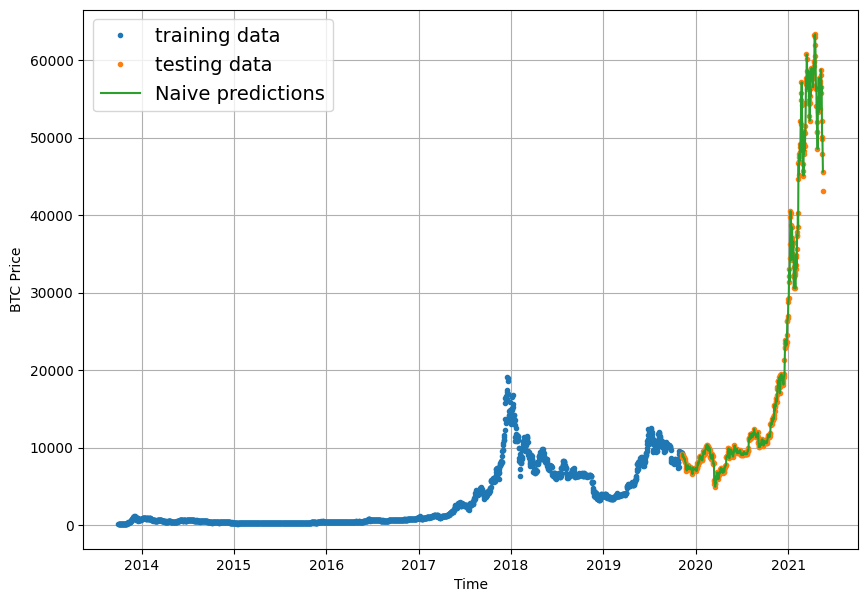

In [20]:
plt.figure(figsize=(10,7))
plot_time_series(time_steps = X_train, values = y_train, label = "training data")
plot_time_series(time_steps = X_test, values = y_test, label = "testing data")
plot_time_series(time_steps = X_test[1:], values = naive_forecast,format = "-",label = "Naive predictions")

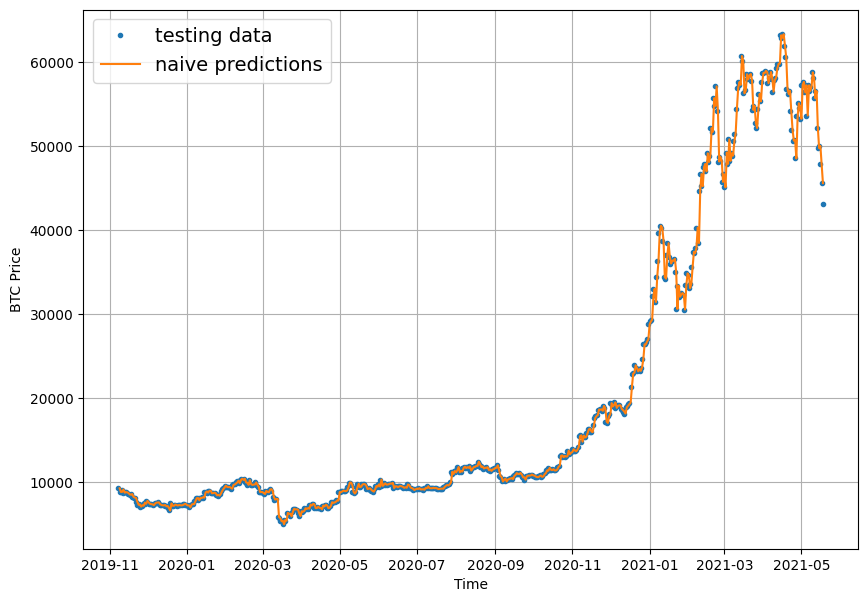

In [21]:
plt.figure(figsize=(10,7))
plot_time_series(time_steps = X_test, values = y_test, label = "testing data")
plot_time_series(time_steps = X_test[1:], format = "-", values = naive_forecast, label = "naive predictions")

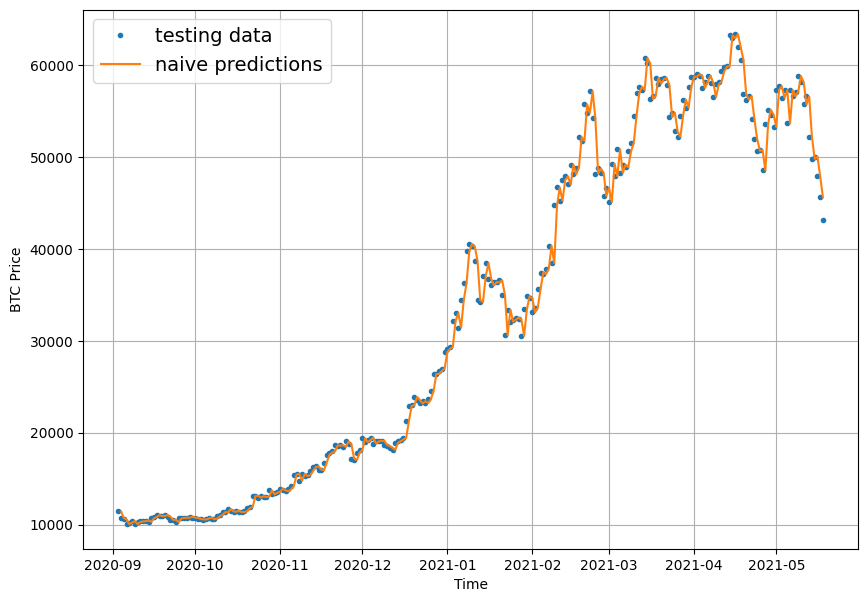

In [22]:
plt.figure(figsize=(10,7))
offset = 300
plot_time_series(time_steps = X_test, values = y_test, start = offset, label = "testing data")
plot_time_series(time_steps = X_test[1:], format = "-", values = naive_forecast, start = offset, label = "naive predictions")

In [23]:
import tensorflow as tf

In [24]:
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true, y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_pred[:-1]))
    return mae / mae_naive_no_season

In [25]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [26]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 24.464115}

In [27]:
tf.reduce_mean(y_test).numpy()

20056.632963737222

# **Formating Data Part 2: Windowing dataset**

In [28]:
HORIZON = 1
WINDOW_SIZE = 7

In [29]:
def get_labelled_windows(x, horizon=1):
    return x[:,:-horizon], x[:,-horizon:]

In [30]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")


Window: [1 2 3 4 5 6 7] -> Label: 8
